#                       **Medical Appointment No Shows Project (EDA)**


---

## Part 1

###**Overview**




In this project, I am using a dataset called **Medical Appointment No Shows** 
which was collected from Kaggle website.

The dataset is basically about the reason that prevents a patient from attending an appointment. the target value in this dataset is initially ("No-show") I will try to answer all questions that come to my mind such as:


*   What are feature/s that affect most on attending the appointment?
*   Does the difference time between the Scheduled Day feature and Appointment Day feature matter?
*   Does Gender contribute to the game?



###**Data Features details**


 1. **PatientId**: Identification of a patient

 2. **AppointmentID**: Identification of each appointment

 3. **Gender**: Male or Female. Female is the greater proportion, women take way more care of their health in comparison to men.

 4. **ScheduledDay**: The day someone called or registered the appointment, this is before the appointment of course.
The day of the actual appointment, when they have to visit the doctor.


 5. **AppointmentDay**: 
The day of the actual appointment, when they have to visit the doctor.



 6. **Age**: How old is the patient.

 7. **Neighbourhood**: Where the appointment takes place.

 8. **Scholarship**: True or False. Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia (Brazilian educational and medical scholarship)

9. **Hypertension**: True or False. Has high pressure?

10. **Diabetes**: True or False.

11. **Alcoholism**: True or False.

11. **Handicap**: True or False.

12. **SMS_received**: 1 or more messages sent to the patient.

13. **No-show**: True or False. The target value which if we decide to model

***Quick note:***

The dataset timeline starts from the 10th of November 2015 to the 23rd of June 2016.


---



##Part 2 



###**Loading and Exploring the dataset**

In [199]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pylab
sns.set_style("whitegrid")

In [212]:
df = pd.read_csv('/KaggleV2-May-2016.csv')

In [253]:
df.head(10)

,Gender,ScheduledDay,AppointmentDay,time_until_visit,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,visit
0,0,2016-04-29,2016-04-29,0,62,0,1,0,0,0,0,0
1,1,2016-04-29,2016-04-29,0,56,0,0,0,0,0,0,0
2,0,2016-04-29,2016-04-29,0,62,0,0,0,0,0,0,0
3,0,2016-04-29,2016-04-29,0,8,0,0,0,0,0,0,0
4,0,2016-04-29,2016-04-29,0,56,0,1,1,0,0,0,0
5,0,2016-04-27,2016-04-29,2,76,0,1,0,0,0,0,0
6,0,2016-04-27,2016-04-29,2,23,0,0,0,0,0,0,1
7,0,2016-04-27,2016-04-29,2,39,0,0,0,0,0,0,1
8,0,2016-04-29,2016-04-29,0,21,0,0,0,0,0,0,0
9,0,2016-04-27,2016-04-29,2,19,0,0,0,0,0,0,0


In [214]:
df.shape

(110527, 14)

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [216]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [217]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Age min value is -1!! we will take care of it and I think it is either a typo or nan.



- Rename mis-spelled column names and use (Male, Female) instead of (M,F).

In [218]:
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'visit'})

- Converting Gender values to Male and Female for better visulaization

In [219]:
df['Gender'] = df.Gender.map({'M':'Male', 'F':'Female'})

- Convert (ScheduledDay, AppointmentDay) to datetime.

In [220]:
df.ScheduledDay = pd.to_datetime(df.ScheduledDay).dt.date.astype('datetime64')
df.AppointmentDay = pd.to_datetime(df.AppointmentDay).dt.date.astype('datetime64')

- New column to calculate the time difference between registration of the appointement and the visit of the appointement

In [221]:
time_until_visit = df.AppointmentDay - df.ScheduledDay
time_until_visit = time_until_visit.dt.days
df.insert(5,"time_until_visit" , time_until_visit)

In [247]:
df.time_until_visit.max()

179

In [249]:
df.time_until_visit.min()

0

-6 for the difference between time of ScheduledDay and AppointmentDay... by logic it is a typo... I will give it 0 which means in the same day!

In [248]:
df.time_until_visit[df.time_until_visit <0] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [222]:
df.visit.unique()

array(['No', 'Yes'], dtype=object)

I will ignore the first 2 columns as they are just random values that could affect our analysis, also the Neighbourhood column contains 88% of random Neighbourhoods, I feel initially it will just add some complexity. I will return to it when needed  

In [223]:
df.drop(['PatientId', 'AppointmentID', 'Neighbourhood'], axis='columns', inplace=True)
df.head(5)

,Gender,ScheduledDay,AppointmentDay,time_until_visit,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,visit
0,Female,2016-04-29,2016-04-29,0,62,0,1,0,0,0,0,No
1,Male,2016-04-29,2016-04-29,0,56,0,0,0,0,0,0,No
2,Female,2016-04-29,2016-04-29,0,62,0,0,0,0,0,0,No
3,Female,2016-04-29,2016-04-29,0,8,0,0,0,0,0,0,No
4,Female,2016-04-29,2016-04-29,0,56,0,1,1,0,0,0,No


In [224]:
df.describe(include=['O'])

,Gender,visit
count,110527,110527
unique,2,2
top,Female,No
freq,71840,88208


let's explore **Age** feature, I think the age of the patient plays an important role.. let's see anyway. 
The age column has 0 and -1 which doesn't make sense... let's fix that by either computing the mean or just assigning 0 to -1.. I think it is a typo.

In [225]:
df[['visit', 'Age']].groupby(['visit'], as_index=False).mean().sort_values(by='visit', ascending=False)

,visit,Age
1,Yes,34.317667
0,No,37.790064


In [226]:
df.Age[df.Age <0] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Age with -1 is now 0 and we will see the plots next part.. I will get back to it. 

In [227]:
df.Age.min()

0

In [228]:
df.groupby('visit').time_until_visit.agg(['mean', 'std', 'median', 'count'])

,mean,std,median,count
visit,,,,
No,8.754659,14.550398,2,88208
Yes,15.831489,16.605912,11,22319


Visit and Gender are encoded for better results.. 0 means NO 1 means Yes, for Gender is  0 Female and 1 for male

In [252]:
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder()
df.visit = labelencoder.fit_transform(df.visit) 
df.Gender = labelencoder.fit_transform(df.Gender) 

Now time to make some plot to investigate more...

##**Part 3**

### **Data Visulaization**

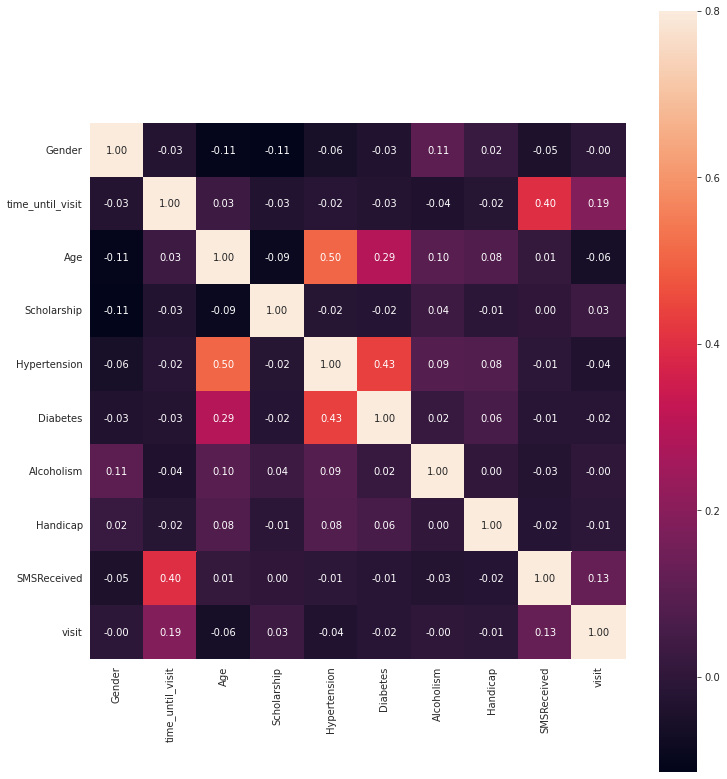

In [264]:
correlation = df.corr()
fig, axes = plt.subplots(figsize=(12,14))
sns.heatmap(correlation, vmax=.8, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10});

from this plot I can see that no strong relationships between visit and many features except for sms_received and time until visit or between some other features like Hypertension and Age.

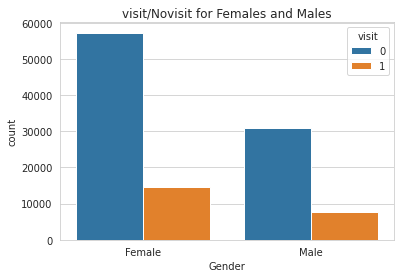

In [251]:
ax = sns.countplot(x=df.Gender, hue=df.visit, data=df)
ax.set_title("visit/Novisit for Females and Males")
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.show()

In total No of visit by female is way more compared to male.. Gender will be not  a bad feature..

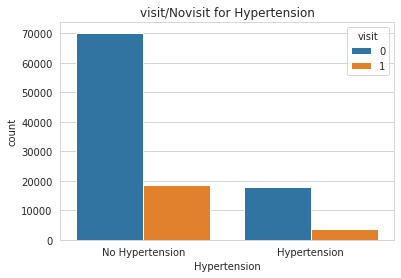

In [260]:
ax = sns.countplot(x=df.Hypertension, hue=df.visit, data=df)
ax.set_title("visit/Novisit for Hypertension")
x_ticks_labels=['No Hypertension', 'Hypertension']
ax.set_xticklabels(x_ticks_labels)
plt.show()

Hypertension shows that no of no hypertension that didn't come is larger but feels the same proprtion. Will get back to findout.

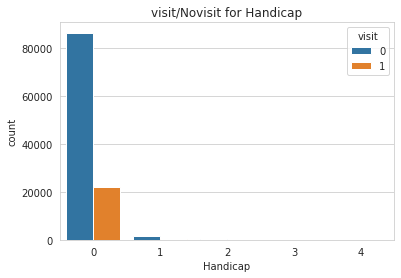

In [262]:
ax = sns.countplot(x=df.Handicap, hue=df.visit, data=df)
ax.set_title("visit/Novisit for Handicap")
plt.show()

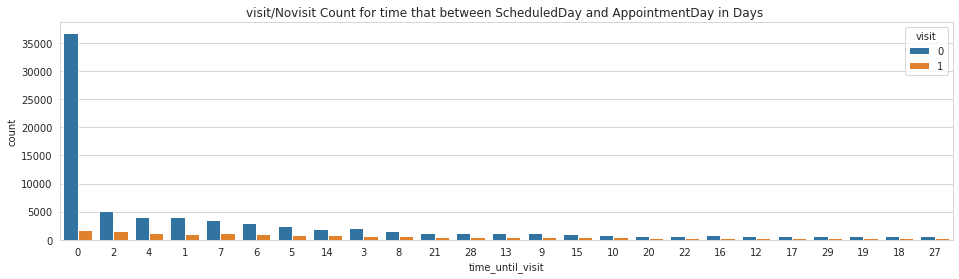

In [267]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.time_until_visit, hue=df.visit, order=df.time_until_visit.value_counts().iloc[:25].index)
ax.set_title("visit/Novisit Count for time that between ScheduledDay and AppointmentDay in Days ")
plt.show()

It is clear that patients who had their appointement in the same day for some reasons didn't come... I think they had toi wait for longer time in hours..